## Image Segmentation
### Similarity Measure options
### Using K-means for Image Segmentation and Image Compression

In [1]:
%matplotlib inline
import numpy as np 
import sklearn.preprocessing
import sklearn.datasets
import pandas as pd
import sklearn.model_selection
import numpy.random
import math
import sklearn.metrics
import cv2
import matplotlib.pyplot as plt
numpy.random.seed(42)

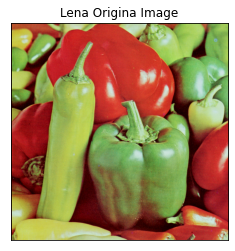

In [2]:
img = plt.imread("peppers.png")
#img = img/255.0
plt.imshow(img)
plt.title("Lena Origina Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [3]:
#Need To add similarity option
class kmeans(object):

    def __init__(self, X_train, k):
        self.K = k
        self.m = X_train.shape[0]
        self.n = X_train.shape[1]
        self.X_train = X_train
        choices = numpy.random.choice(np.arange(0, self.m), self.K, replace=False)
        self.centers = [X_train[choices[i], :].reshape(-1, 1) for i in range(0, self.K)]# initalize the clusters centers to be one of the observations
        self.clusters_assignments = np.zeros((self.m, 1))#Just to give it the necessary shape
    
    def reassign_clusters_centers(self):
        for k in range(0, self.K):
            temp = np.zeros((self.n, 1))
            clusters = list(map(lambda i: True if i == k else False, self.clusters_assignments))
            clusters = np.array([clusters]*self.n)
            temp = np.sum( clusters.T *1 *self.X_train, axis=0)
            #for i in range(0, self.m):
                #if clusters[i] == True:
                #   temp += clusters[i] * self.X_train[i, :].reshape(-1, 1)#clusters contained in {0, 1}
                #else:
                #    pass

            #print(np.sum(clusters))
            self.centers[k] = temp/(np.sum(clusters) + 1)

    def distortiuon_function(self):
        temp = 0
        for i in range(0, self.m):
            for k in range(0, self.K):
                if self.clusters_assignments[i] == k:
                    temp += np.linalg.norm(self.X_train[i, :].reshape(-1, 1) - self.centers[k].reshape(-1, 1))**2
                    break#They willn't be assigned to more than one cluster in tandem
        return temp

    def assign_to_clusters(self, x):
        temp = []
        for k in range(0, self.K):
            temp.append(np.linalg.norm(x.reshape(-1, 1) - self.centers[k].reshape(-1, 1))**2)#We will use L2-norm for dissimilarity measure
        return np.argmin(temp)#return the cluster number

    def E_step(self):
        self.clusters_assignments = np.array(list(map(lambda x: self.assign_to_clusters(x.reshape(-1, 1)), self.X_train)))
		#for i in range(0, self.m):
            #self.clusters_assignments[i] = self.assign_to_clusters(self.X_train[i, :].reshape(-1, 1))
    
    def fit(self, max_iterations, eps=1e-5):
        past = 10
        future = 0
        count = 0
        self.E_step()#To initialize the clusters assignments
        while(abs(past - future) > eps):#I will care for only lack of progress because k-means will always be able to minimize the distortion functions
            print(f"count:{count}, max_iterations{max_iterations}, past:{past}, future:{future}")
            count += 1
            past = self.distortiuon_function()
            self.reassign_clusters_centers()#The M step
            self.E_step()
            future = self.distortiuon_function()
            
        print(f"count:{count}, max_iterations{max_iterations}, past:{past}, future:{future}")
        return self.centers, self.clusters_assignments

    def prediction_dataset(self, X):
        predictions = []
        for i in range(0, X.shape[0]):
            predictions.append(self.assign_to_clusters(X[i, :].reshape(-1, 1)))
        return predictions

    def predict(self, x):
        return  self.assign_to_clusters(x.reshape(-1, 1))

In [4]:
print(img[:, :, 0].shape)
pixels = np.zeros((img.shape[0]*img.shape[1], img.shape[2]))
for i in range(0, img.shape[0]):#across rows(v-direction)
    for j in range(0, img.shape[1]):#across columns(u_direction)
        pixels[i+j, :] = img[i, j, :]
print(pixels.shape)
pixels[0:10, :]

(512, 512)
(262144, 3)


array([[0.39607844, 0.        , 0.        ],
       [0.48235294, 0.        , 0.        ],
       [0.49411765, 0.        , 0.        ],
       [0.48235294, 0.        , 0.        ],
       [0.49803922, 0.        , 0.        ],
       [0.48627451, 0.        , 0.        ],
       [0.46666667, 0.        , 0.        ],
       [0.47058824, 0.        , 0.        ],
       [0.45490196, 0.        , 0.        ],
       [0.42352942, 0.        , 0.        ]])

In [5]:
K=10
model = kmeans(pixels, K)
centers, clusters  = model.fit(1000)

count:0, max_iterations1000, past:10, future:0
count:1, max_iterations1000, past:657.2269409853774, future:656.1229495972664
count:2, max_iterations1000, past:656.1229495972664, future:420.53472967599555
count:3, max_iterations1000, past:420.53472967599555, future:412.8309491515068
count:4, max_iterations1000, past:412.8309491515068, future:412.5085658330242
count:5, max_iterations1000, past:412.5085658330242, future:411.67026743753024
count:6, max_iterations1000, past:411.67026743753024, future:411.5041181880807
count:7, max_iterations1000, past:411.5041181880807, future:411.5041181880807


In [12]:
clusters[1000:2000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

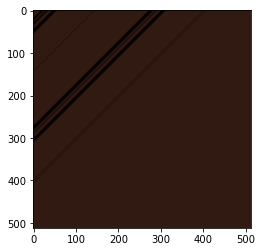

In [6]:
img_compressed = np.zeros((img.shape[0], img.shape[1], img.shape[2]))

for i in range(0, img_compressed.shape[0]):
	for j in range(0, img_compressed.shape[1]):
		for k in range(0, K):
			if (clusters[int(i+j)] == k):
				img_compressed[i, j, :] = centers[k].reshape(1, -1)
				break
plt.imshow(img_compressed)
plt.show()
			

### References 
* Chapter 1, chapter 2 and Chapter 9 from Bishop, C. (2006). Pattern Recognition and Machine Learning. Cambridge: Springer.
* Andrew Ng, Lec 12: (https://www.youtube.com/watch?v=ZZGTuAkF-Hw)

